In [953]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal

In [954]:
trainingData = 'P2_data/P2_train.csv'
testData = 'P2_data/P2_test.csv'

In [955]:
dRows = []
tdRows = []
with open(trainingData, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        dRows.append(row)
with open(testData, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        tdRows.append(row)

In [956]:
temp = []
c0 = []
c1 = []
iter1 = 0
for y in dRows:
    temp.append([float(x) for x in y])

label1 = [x[2] for x in temp]
for row in label1:
    if(row == 0.0):
        c0.append([temp[iter1][x] for x in range(0,2)])
    elif(row == 1.0):
        c1.append([temp[iter1][x] for x in range(0,2)])
    iter1+=1

In [957]:
temp = []
t0 = []
t1 = []
iter2 = 0
for y in tdRows:
    temp.append([float(x) for x in y])
    
label2 = [x[2] for x in temp] #for verification

for row in label2:
    if(row == 0.0):
        t0.append([temp[iter2][x] for x in range(0,2)])
    elif(row == 1.0):
        t1.append([temp[iter2][x] for x in range(0,2)])
    iter2+=1 

In [958]:
prior0 = len(c0)/(len(c0)+ len(c1))
prior1 = len(c1)/(len(c0)+ len(c1))

In [959]:
c0_mean = np.mean(c0, axis = 0)
c1_mean = np.mean(c1, axis = 0)
cov_c0 = np.cov(np.transpose(c0))
cov_c1 = np.cov(np.transpose(c1))

In [960]:
def gaussian(temp, cov_c0_, cov_c1_, c0_mean_, c1_mean_):
    p0 = []
    p1 = []
    p0_new = []
    p1_new = []
    temp2 = [x[0:2] for x in temp]
    length = len(temp2)
    for i in range(0,length):
        p0.append((1/((2* np.pi)*np.power(np.linalg.det(cov_c0_),0.5))) *(np.exp (-0.5 * (np.linalg.multi_dot([(temp2[i] - c0_mean_) , (np.linalg.inv(cov_c0_)), (temp2[i] - c0_mean_).T])) )) )
        p1.append((1/((2* np.pi)*np.power(np.linalg.det(cov_c1_),0.5))) *(np.exp (-0.5 * (np.dot(np.dot((temp2[i] - c1_mean_) , np.linalg.inv(cov_c1_)), np.transpose(temp2[i] - c1_mean_))))) )
    p0_new = [i*prior0 for i in p0]
    p1_new = [i*prior1 for i in p1]
    return p0_new, p1_new

In [961]:
def classify_data(p0_new, p1_new):
    classify = []
    confusion = []
    for i in range(0, length):
        if p0_new[i] < p1_new[i]:
            classify.append(1)
        elif p1_new[i] < p0_new[i]:
            classify.append(0)

# tp = true positive (expected = 6, classified = 6)
# tn = true negative (expected = 5, classified = 5)
# fp = false positive (expected = 5, classified = 6)
# fp = false negative (expected = 6, classified = 5)
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(0, length):
        if classify[i] == 1 and label2[i] == 1:
            tp+=1
        if classify[i] == 0 and label2[i] == 0:
            tn+=1
        if classify[i] == 0 and label2[i] == 1:
            fn+=1
        if classify[i] == 1 and label2[i] == 0:
            fp+=1

    print("Total Samples: ",fn+tp+tn+fp)
    print("Accuracy for 1: ",(tp)/(fn+tp))
    print("Accuracy for 0: ",(tn)/(tn+fp))
    print("Total Accuracy: ",(tp+tn)/(fn+tp+tn+fp))

    confusion = [[tn, fp],[fn, tp]]
    print("Confusion Matrix: ", confusion)
    misclass0 = fp/(fp + tn)
    misclass1 = fn/(fn + tp)
    print("Misclassification Error for 0: ", misclass0)
    print("Misclassification Error for 1: ", misclass1)


In [962]:
def plotting(cov_c2, cov_c3, c2_mean, c3_mean):
    z3 = []
    z4 = []
    x = np.linspace(-4,4,90)
    y = np.linspace(-8,8,90)
    X, Y = np.meshgrid(x,y)
    z = bivariate_normal(X,Y, cov_c2[0][0] ** 0.5, cov_c2[1][1] ** 0.5, c2_mean[0], c2_mean[1], cov_c2[0][1] )
    z1 = bivariate_normal(X,Y, cov_c3[0][0] ** 0.5, cov_c3[1][1] ** 0.5, c3_mean[0], c3_mean[1], cov_c3[0][1] )
    plt.contour(X, Y, z1-z, colors='blue')


### Uncomment the cases below one by one and run the entire script to get the respective confusion matrices
#### Keep ONLY one  cell uncommented (any one case)


In [963]:
# # Case A
# cov_A = cov_c0
# cov_A[1][0] = 0
# cov_A[0][1] = 0
# cov_A[1][1] = cov_A[0][0]

# [p0_new_A, p1_new_A] = gaussian(temp, cov_A, cov_A, c0_mean, c1_mean)
# classify_data(p0_new_A, p1_new_A)
# plotting(cov_A, cov_A, c0_mean, c1_mean)

In [964]:
# # Case B
# cov_B = cov_c0
# cov_B[1][0] = 0
# cov_B[0][1] = 0

# [p0_new_B, p1_new_B] = gaussian(temp, cov_B, cov_B, c0_mean, c1_mean)
# classify_data(p0_new_B, p1_new_B)
# plotting(cov_B, cov_B, c0_mean, c1_mean)

In [965]:
# # Case C
# cov_C = cov_c0

# [p0_new_C, p1_new_C] = gaussian(temp, cov_C, cov_C, c0_mean, c1_mean)
# classify_data(p0_new_C, p1_new_C)
# plotting(cov_C, cov_C, c0_mean, c1_mean)

Total Samples:  90
Accuracy for 1:  1.0
Accuracy for 0:  1.0
Total Accuracy:  1.0
Confusion Matrix:  [[50, 0], [0, 40]]
Misclassification Error for 0:  0.0
Misclassification Error for 1:  0.0


/Users/yashgandhe/Coding/Virtualenv/machineL/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  import sys
/Users/yashgandhe/Coding/Virtualenv/machineL/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  


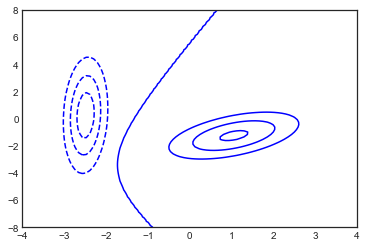

In [966]:
# Case D
[p0_new, p1_new] = gaussian(temp, cov_c0, cov_c1, c0_mean, c1_mean)
classify_data(p0_new, p1_new)
plotting(cov_c0, cov_c1, c0_mean, c1_mean)